# Library

In [57]:
import numpy as np
import pandas as pd
import os
import glob
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# warning 무시
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Load

In [43]:
# 데이터 경로
mask_dir = glob.glob('/content/drive/My Drive/mask/with_mask/*.png')
nomask_dir = glob.glob('/content/drive/My Drive/mask/without_mask/*.png')

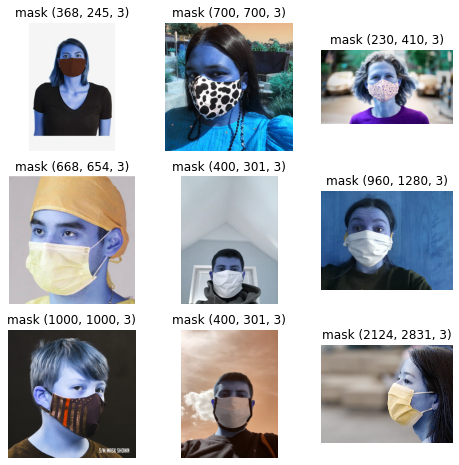

In [44]:
# 마스크 착용 이미지
plt.figure(figsize=(8, 8))
labels = "mask"
for i, images in enumerate(mask_dir[:9]):
    ax = plt.subplot(3, 3, i + 1)
    mask_img = cv2.imread(images)
    plt.imshow(mask_img)
    plt.title(f'{labels} {mask_img.shape}')
    plt.axis("off")

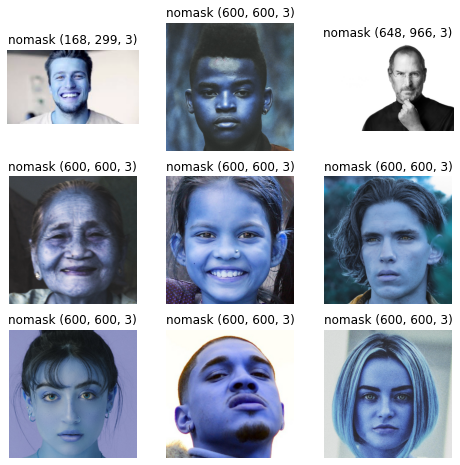

In [45]:
# 마스크 미착용 이미지
plt.figure(figsize=(8, 8))
labels = "nomask"
for i, images in enumerate(nomask_dir[:9]):
    ax = plt.subplot(3, 3, i + 1)
    nomask_img = cv2.imread(images)
    plt.imshow(nomask_img)
    plt.title(f'{labels} {nomask_img.shape}')
    plt.axis("off")

# Tensorflow

## Split train&valid set

학습:검증 비율 -> 8:2 로 나눕니다.

In [46]:
data_split = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

이미지의 사이즈는 16 by 16으로 설정

In [47]:
width = 32
height = 32

training 이미지 불러오기

In [48]:
trainData = data_split.flow_from_directory(directory = '/content/drive/My Drive/mask/',
                                           target_size = (height, width),
                                           class_mode = 'binary',
                                           batch_size = 64,
                                           subset='training')

Found 352 images belonging to 2 classes.


In [50]:
trainData.num_classes

2

In [52]:
trainData.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

validation 이미지 불러오기

In [49]:
valData =data_split.flow_from_directory(directory = '/content/drive/My Drive/mask/',
                                         target_size =(height, width),
                                         class_mode = 'binary',
                                         batch_size = 64,
                                         subset='validation')

Found 88 images belonging to 2 classes.


In [53]:
valData.num_classes

2

In [54]:
valData.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

## Modeling Using deeplearning

In [55]:
model = Sequential()

# 입력층
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid',
                 activation='relu', input_shape=(height, width, 3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))


model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))
model.add(Dropout(0.2))

# Fully-connected layer
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))

# 출력층=> binary classification
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                    

레이어 시각화

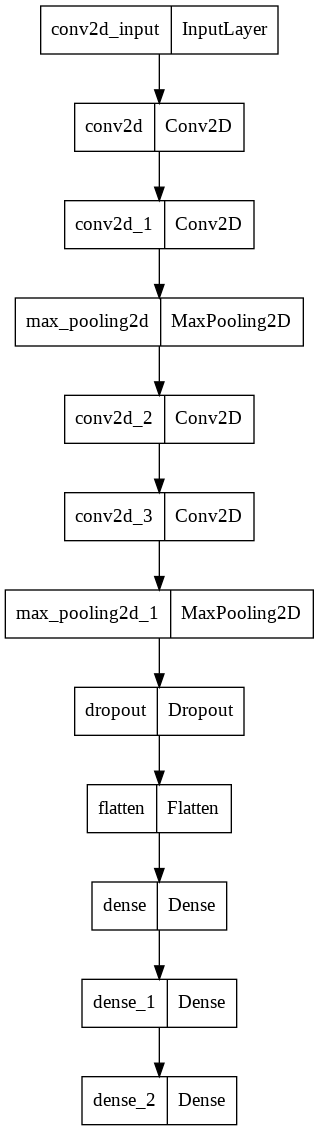

In [58]:
plot_model(model)

컴파일

In [59]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics="accuracy"
)

## Train

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
early_stop

In [62]:
history = model.fit(trainData, epochs=1000, 
                    callbacks=early_stop, validation_data=valData)

Epoch 1/1000
6/6 [==============================] - 14s 2s/step - loss: 0.7051 - accuracy: 0.5028 - val_loss: 0.6655 - val_accuracy: 0.5568
Epoch 2/1000
6/6 [==============================] - 14s 3s/step - loss: 0.6280 - accuracy: 0.6733 - val_loss: 0.5929 - val_accuracy: 0.7614
Epoch 3/1000
6/6 [==============================] - 12s 2s/step - loss: 0.5386 - accuracy: 0.7472 - val_loss: 0.4602 - val_accuracy: 0.8295
Epoch 4/1000
6/6 [==============================] - 10s 2s/step - loss: 0.4003 - accuracy: 0.8352 - val_loss: 0.3975 - val_accuracy: 0.8750
Epoch 5/1000
6/6 [==============================] - 11s 2s/step - loss: 0.3393 - accuracy: 0.8778 - val_loss: 0.2952 - val_accuracy: 0.8977
Epoch 6/1000
6/6 [==============================] - 10s 2s/step - loss: 0.2648 - accuracy: 0.9006 - val_loss: 0.2971 - val_accuracy: 0.8977
Epoch 7/1000
6/6 [==============================] - 10s 2s/step - loss: 0.2608 - accuracy: 0.9119 - val_loss: 0.3639 - val_accuracy: 0.8295
Epoch 8/1000
6/6 [==

In [65]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,0.705071,0.502841,0.665493,0.556818
1,0.627976,0.673295,0.592940,0.761364
2,0.538642,0.747159,0.460213,0.829545
3,0.400322,0.835227,0.397461,0.875000
4,0.339346,0.877841,0.295242,0.897727
5,0.264809,0.900568,0.297115,0.897727
6,0.260824,0.911932,0.363914,0.829545
7,0.288767,0.872159,0.244314,0.886364
8,0.238387,0.917614,0.326328,0.875000
9,0.251426,0.900568,0.309041,0.863636


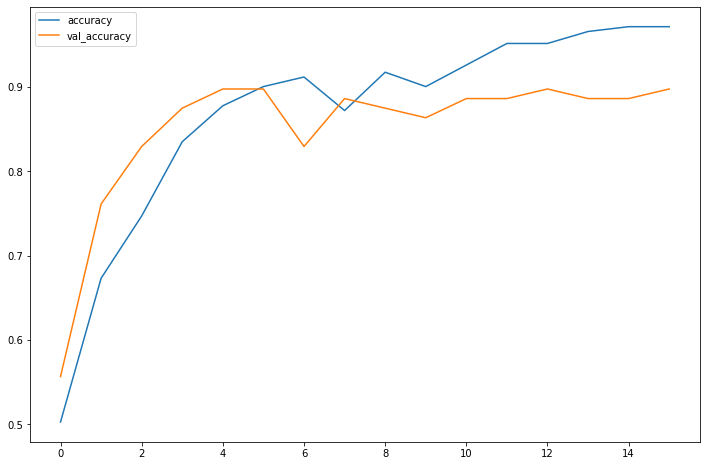

In [66]:
df_hist[['accuracy', 'val_accuracy']].plot(figsize=(12,8))

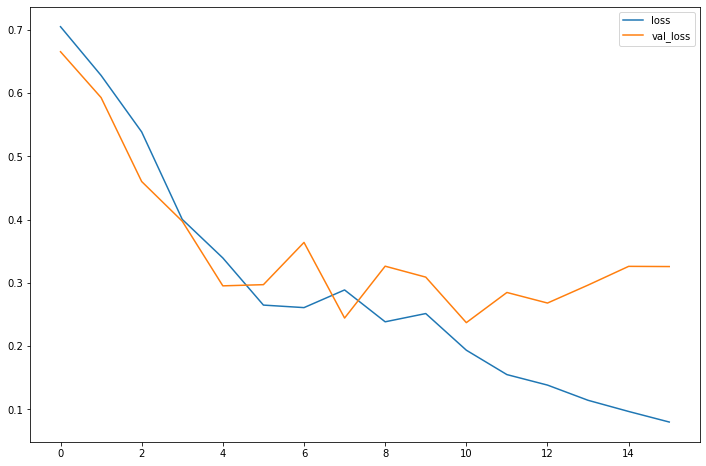

In [67]:
df_hist[['loss', 'val_loss']].plot(figsize=(12,8))

## Pytorch